In [1]:
from fullfrlm import flow_refueling_location_model
from generate_network import generate_network
from flow_computation import flow_computation
from random_vessel_generator import random_vessel_generator
from first_stage_frlm import first_stage_frlm
from second_stage_frlm import second_stage_frlm
from create_input_data_abm import create_input_data_abm
from visualize_placement import visualize_placement
import pickle
import time


Optimal


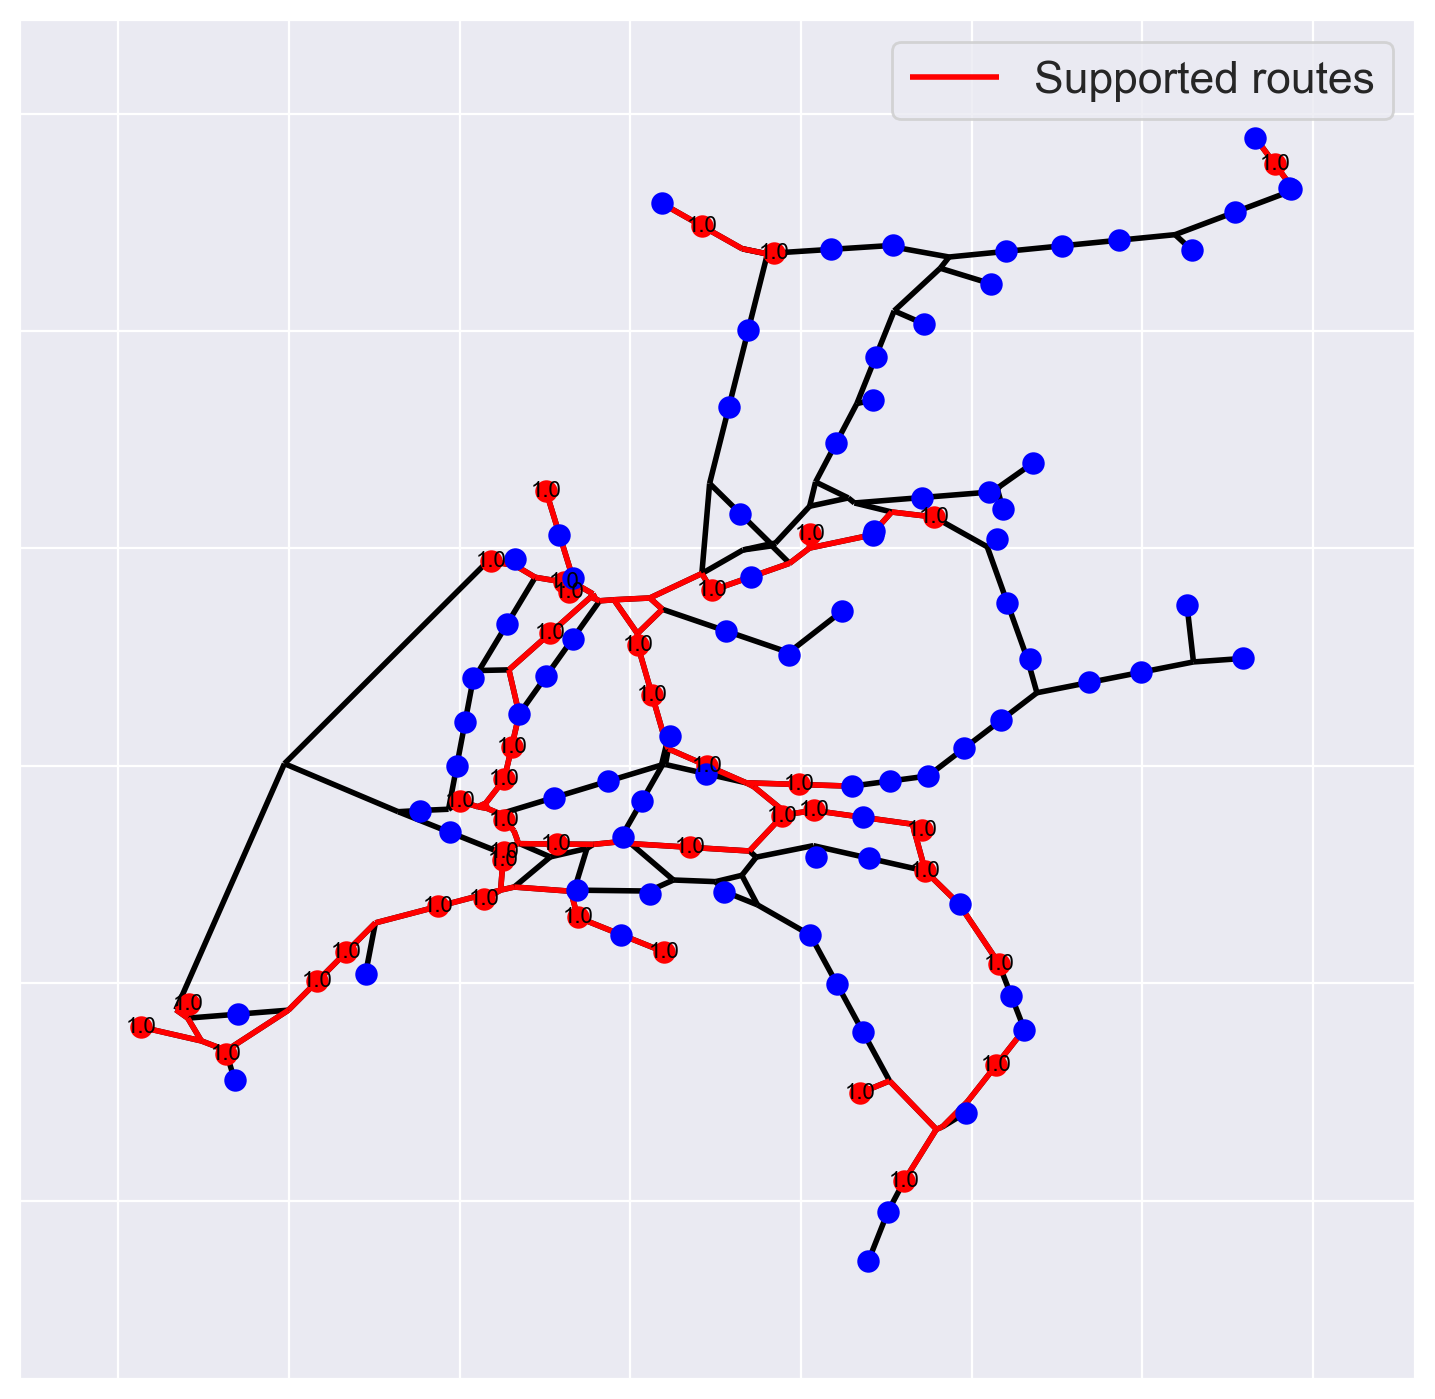

CPU times: total: 26.5 s
Wall time: 29 s


In [12]:
%%time
## Test full frlm
total_flow, fraction_captured_total, serveable_fraction, served_fraction, optimal_facilities, \
        non_zero_flows, routes_supported, paths, G, df_abm, df_random = flow_refueling_location_model(1, 50000, 40, 1000, 1, 50, vis=True)

In [13]:
fraction_captured_total

0.24175816830155417

In [14]:
serveable_fraction

0.7006176391128741

In [15]:
served_fraction

0.34506434723463386

In [16]:
sum(optimal_facilities.values())

40.0

## Load necessary data

In [2]:
df_h = pickle.load(open("data/revised_cleaning_results/harbour_data_100.p", "rb"))
df_ivs = pickle.load(open("data/revised_cleaning_results/ivs_exploded_100.p", "rb"))
path_lengths = pickle.load(open("data/revised_cleaning_results/path_lengths_ship_specific_routes.p", "rb"))

In [3]:
df_ivs

,origin,destination,trip_count,hour,M12,M8,BII-6b,M10,BIIa-1,M9,...,B04,M0,C2l,BII-2L,B02,C1b,C2b,B01,C1l,route_v
0,NLRTM,NLAMS,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NLRTM,NLAMS,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NLRTM,NLAMS,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NLRTM,NLAMS,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NLRTM,NLAMS,6,4,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,NLAMS,NLZWI,1,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3908,NLAMS,NLZWI,0,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3909,NLAMS,NLZWI,0,21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3910,NLAMS,NLZWI,1,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


## Generate random df

In [4]:
%%time
df_chance = df_ivs.copy()
df_random1 = random_vessel_generator(df_chance, 1)

CPU times: total: 2.53 s
Wall time: 2.61 s


In [5]:
df_random1

,origin,destination,trip_count,hour,M12,M8,BII-6b,M10,BIIa-1,M9,...,B04,M0,C2l,BII-2L,B02,C1b,C2b,B01,C1l,route_v
0,NLRTM,NLAMS,160,0,0,106,0,0,2,32,...,0,0,0,0,0,0,0,0,0,1
1,NLRTM,NLAMS,142,0,87,0,0,18,0,0,...,0,0,0,0,0,0,0,0,0,2
2,NLRTM,NLMOE,62,0,0,46,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
3,NLRTM,NLMOE,28,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,NLRTM,NLVLI,75,0,12,15,0,1,0,27,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2828,NLHRV,NLAMS,8,23,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2829,NLRTM,NLLID,1,23,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2830,NLRTM,NLSLU,20,23,0,19,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2831,NLRTM,NLSLU,1,23,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1



## Compute path flows

In [6]:
%%time
flows = flow_computation(df_random1)

CPU times: total: 500 ms
Wall time: 534 ms


In [7]:
flows

{('NLABL', 'NLRTM', 0): 12.548180039138947,
 ('NLAER', 'NLLEY', 0): 4.5920156555773,
 ('NLAER', 'NLNIE', 0): 7.891115459882583,
 ('NLAER', 'NLRTM', 0): 17.844148727984344,
 ('NLAER', 'NLSWI', 0): 2.8999608610567513,
 ('NLALK', 'NLIJM', 0): 3.6850097847358114,
 ('NLALM', 'NLAMS', 0): 3.8519765166340507,
 ('NLAMS', 'NLAER', 0): 21.020430528375734,
 ('NLAMS', 'NLDEV', 0): 6.969393346379647,
 ('NLAMS', 'NLHEJ', 0): 3.3747945205479453,
 ('NLAMS', 'NLMOE', 0): 0.025048923679060663,
 ('NLAMS', 'NLMOE', 1): 0.4154207436399217,
 ('NLAMS', 'NLMOE', 2): 2.1604696673189827,
 ('NLAMS', 'NLMOE', 3): 15.817221135029353,
 ('NLAMS', 'NLMOE', 4): 1.6088454011741686,
 ('NLAMS', 'NLOSS', 0): 6.240861056751465,
 ('NLAMS', 'NLTIE', 0): 3.797886497064579,
 ('NLAMS', 'NLUTC', 1): 6.598825831702542,
 ('NLAMS', 'NLWGW', 0): 4.522426614481408,
 ('NLAMS', 'NLWMO', 0): 2.5997651663405086,
 ('NLAMS', 'NLZAA', 0): 3.125009784735812,
 ('NLAMS', 'NLZWI', 0): 0.09393346379647749,
 ('NLAMS', 'NLZWI', 1): 0.4903326810176

## Generate network

In [32]:
%%time
G = pickle.load(open('data/network_cleaned_final.p', 'rb'))
paths = pickle.load(open("data/final_paths.p", "rb"))
G, paths, inserted_nodes = generate_network(G, paths, 40)

CPU times: total: 1.31 s
Wall time: 1.41 s


In [33]:
%%time
# range r in meters
df_b, df_g, df_eq_fq, feasible_combinations = first_stage_frlm(100000, G, OD=flows, paths=paths, path_lengths=path_lengths, df_h=df_h, additional_nodes=inserted_nodes)

CPU times: total: 9.38 s
Wall time: 9.83 s


## Run second stage FRLM

In [38]:
%%time
optimal_facilities, optimal_flows, non_zero_flows, supported_flow, routes_supported = second_stage_frlm(100000, 15000, 175, 40, 2500, 2, df_g, df_b, df_eq_fq)

Optimal
CPU times: total: 49 s
Wall time: 49.5 s


In [39]:
sum(optimal_facilities.values())

80.0

In [40]:
sum(optimal_flows.values())

66.8320939004

In [41]:
supported_flow

499.6038226724985

## Create input data ABM

In [14]:
%%time
df_abm = create_input_data_abm(G,paths, non_zero_flows, optimal_facilities)

CPU times: total: 438 ms
Wall time: 427 ms


In [15]:
df_abm

,id,source,target,length_m,X,Y,name,charging_stations,model_type
0,0,30986055,8867600,8380.518917,5.365231,53.183419,"(30986055, 8867600)",NaN,link
1,1,30986055,8865756,2481.139176,5.412350,53.178500,"(30986055, 8865756)",NaN,link
2,2,11309058,8865990,18936.187403,5.450226,51.645417,"(11309058, 8865990)",NaN,link
3,3,11309058,8866775,11560.215727,5.324146,51.695530,"(11309058, 8866775)",NaN,link
4,4,11309058,11309119,9235.019525,5.349926,51.714149,"(11309058, 11309119)",NaN,link
...,...,...,...,...,...,...,...,...,...
295,139,NaN,NaN,NaN,5.279431,52.310390,111,1.0,charging_station
296,140,NaN,NaN,NaN,4.436741,51.676455,112,3.0,charging_station
297,141,NaN,NaN,NaN,5.210375,53.241520,113,3.0,charging_station
298,142,NaN,NaN,NaN,5.700503,51.787230,115,0.0,inserted_node


## Visualize placement

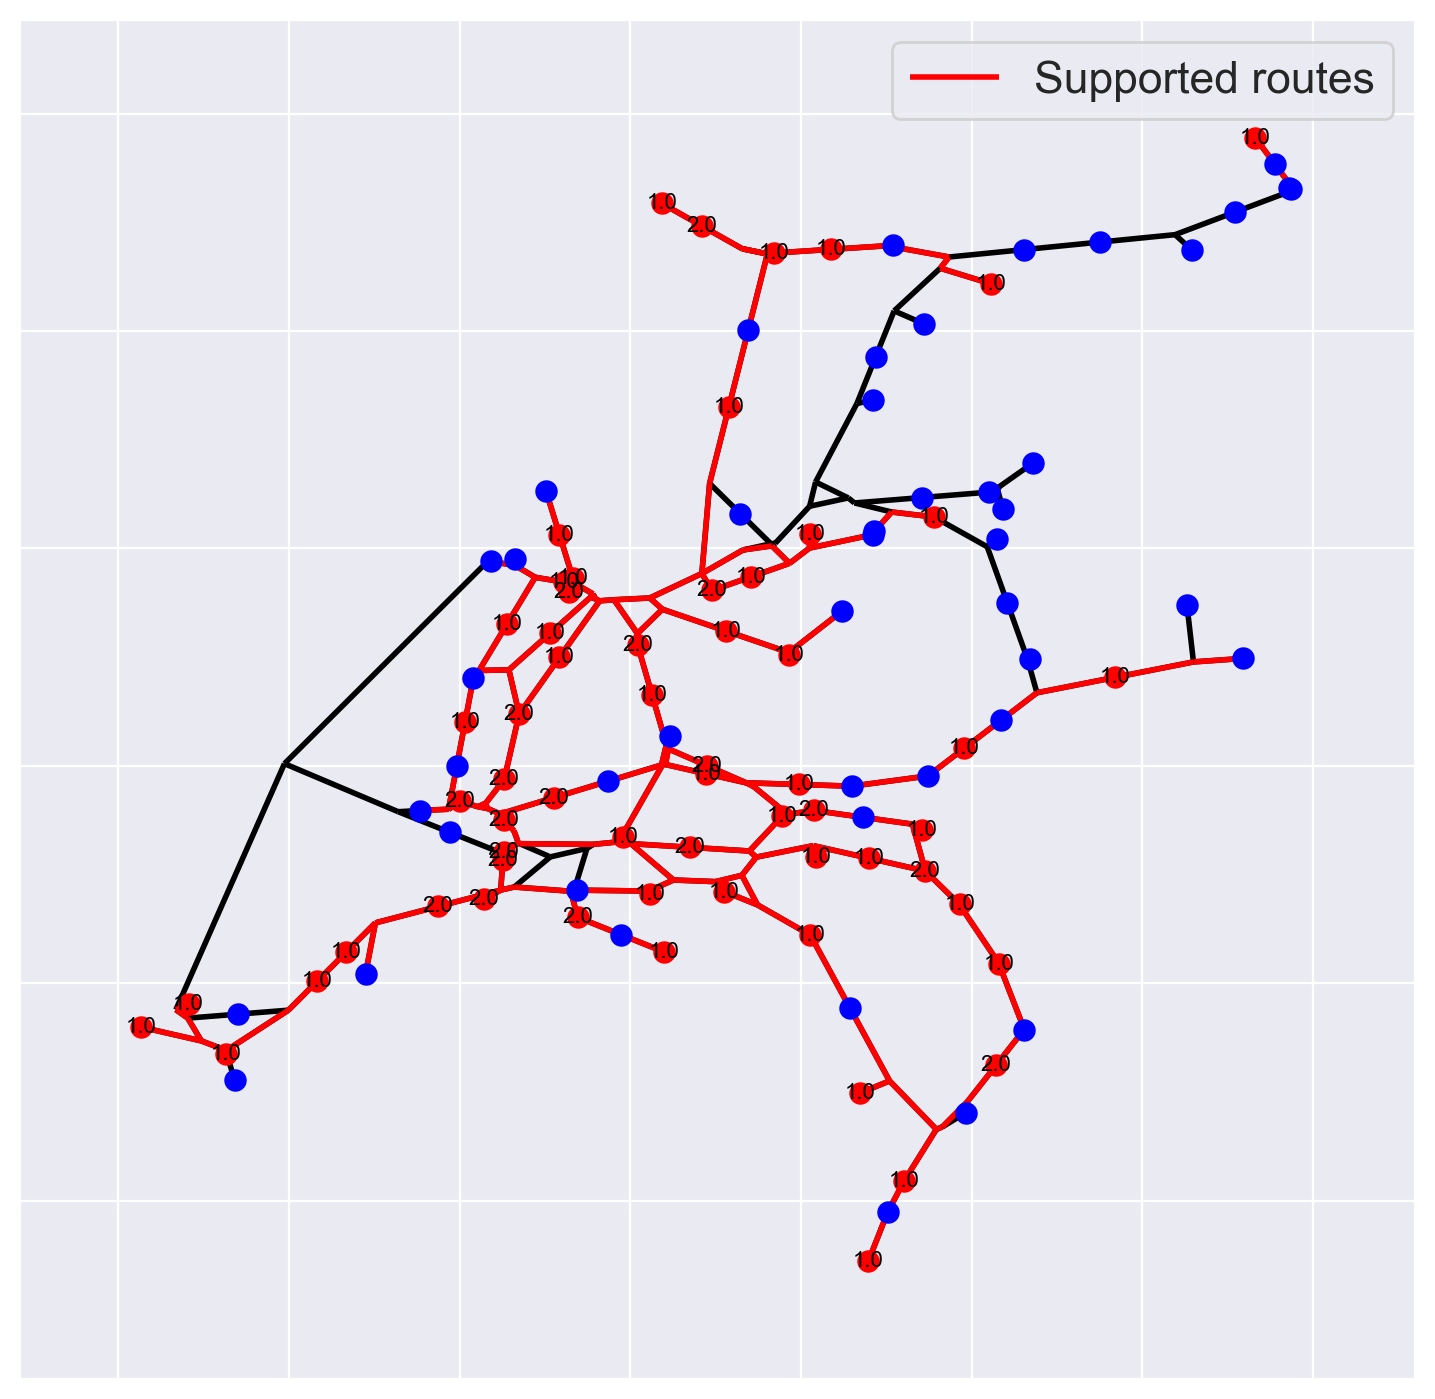

CPU times: total: 422 ms
Wall time: 411 ms


In [42]:
%%time
visualize_placement(G, flows, optimal_facilities, non_zero_flows, df_h, paths, unused=True)

## Try out complete function

### range 50km

Optimal


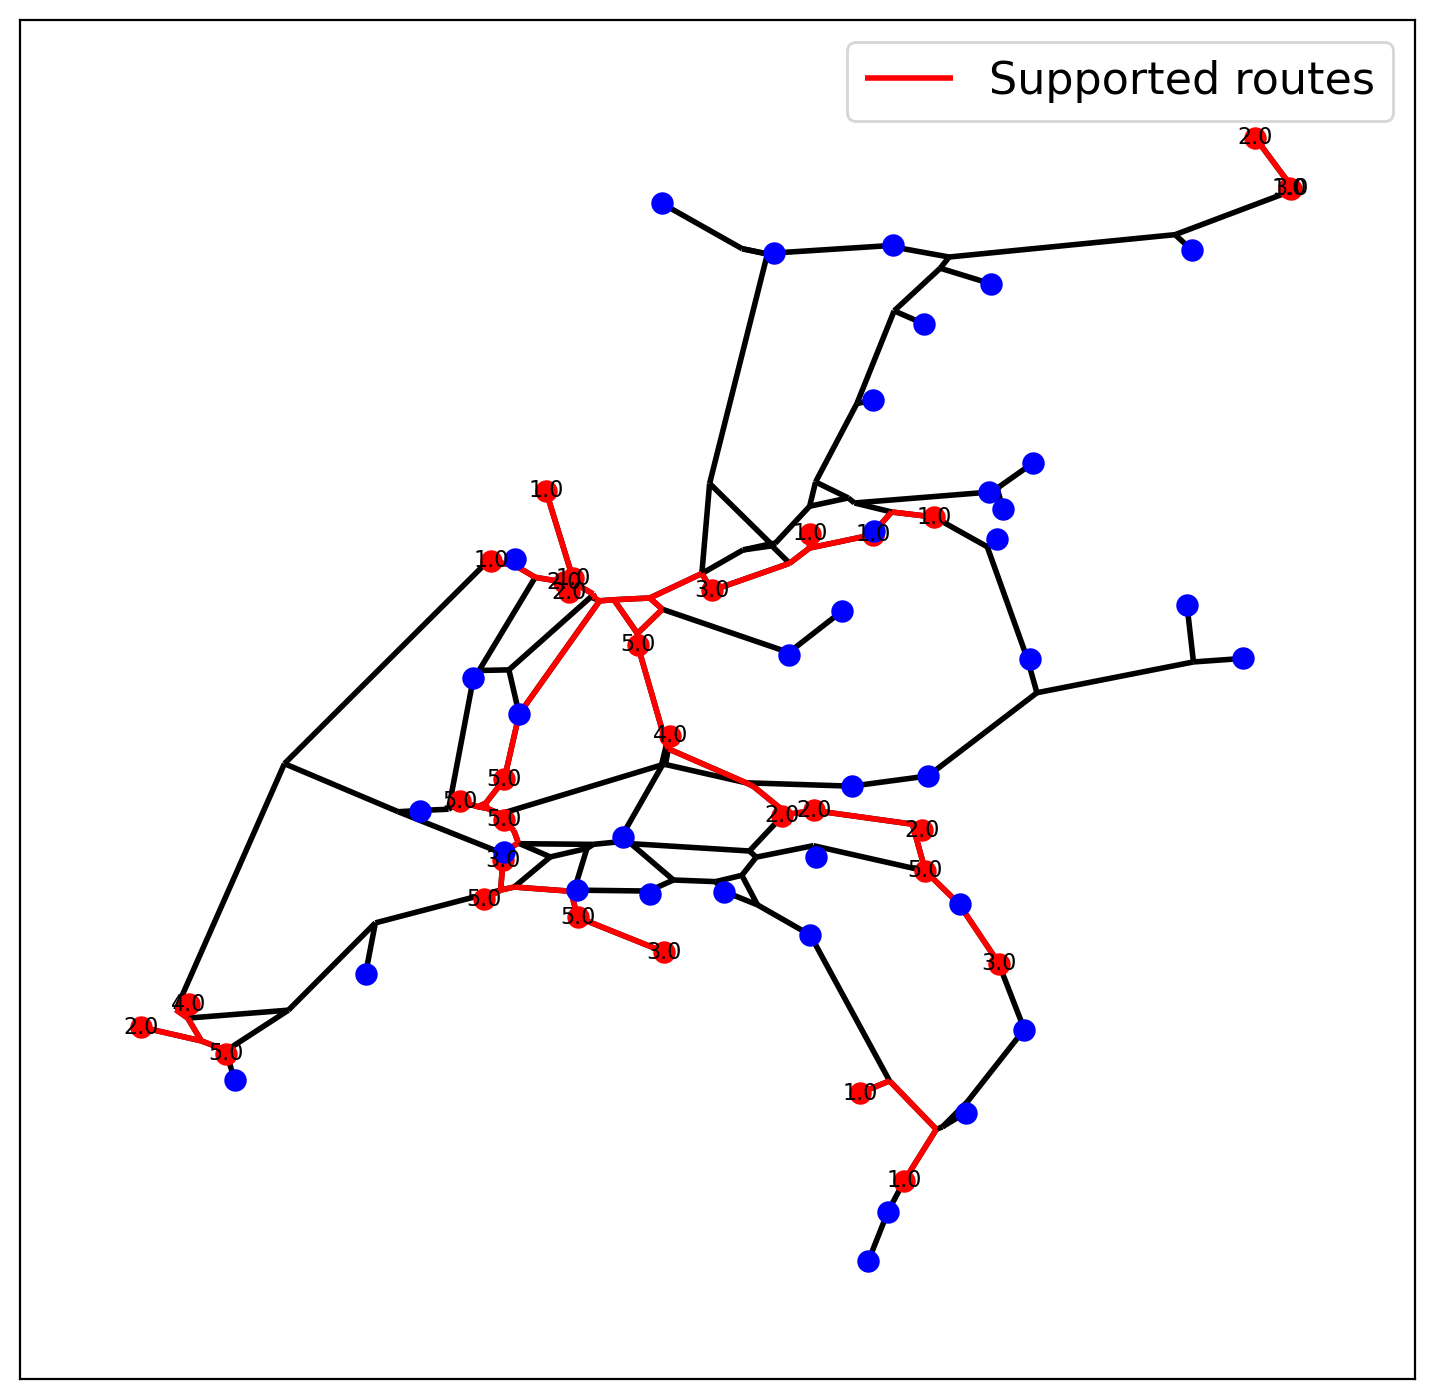

(1257.3618003913894,
 0.15436626650928026,
 0.26472332309248503,
 0.5831230308912,
 {'22637863': 0.0,
  '22638146': 2.0,
  '22638156': 0.0,
  '22638320': 0.0,
  '22638327': 2.0,
  '30984595': 5.0,
  '8861305': 0.0,
  '8861462': 0.0,
  '8861528': 2.0,
  '8861625': 1.0,
  '8861718': 0.0,
  '8862085': 0.0,
  '8862497': 1.0,
  '8862506': 0.0,
  '8862570': 0.0,
  '8862663': 3.0,
  '8863019': 0.0,
  '8863125': 0.0,
  '8863152': 0.0,
  '8863207': 0.0,
  '8863260': 2.0,
  '8863306': 5.0,
  '8863360': 0.0,
  '8863408': 0.0,
  '8863469': 5.0,
  '8863518': 0.0,
  '8863614': 1.0,
  '8863709': 1.0,
  '8863818': 5.0,
  '8863861': 0.0,
  '8863966': 0.0,
  '8864005': 3.0,
  '8864018': 0.0,
  '8864111': 4.0,
  '8864153': 0.0,
  '8864494': 0.0,
  '8864566': 3.0,
  '8864837': 5.0,
  '8864954': 0.0,
  '8865003': 0.0,
  '8865412': 2.0,
  '8865600': 5.0,
  '8865605': 0.0,
  '8865756': 0.0,
  '8865990': 0.0,
  '8866297': 2.0,
  '8866425': 0.0,
  '8866564': 0.0,
  '8866627': 0.0,
  '8866671': 0.0,
  '8866686'

In [14]:
flow_refueling_location_model(1, 50000, 100, 5, 5, vis=True)

Optimal


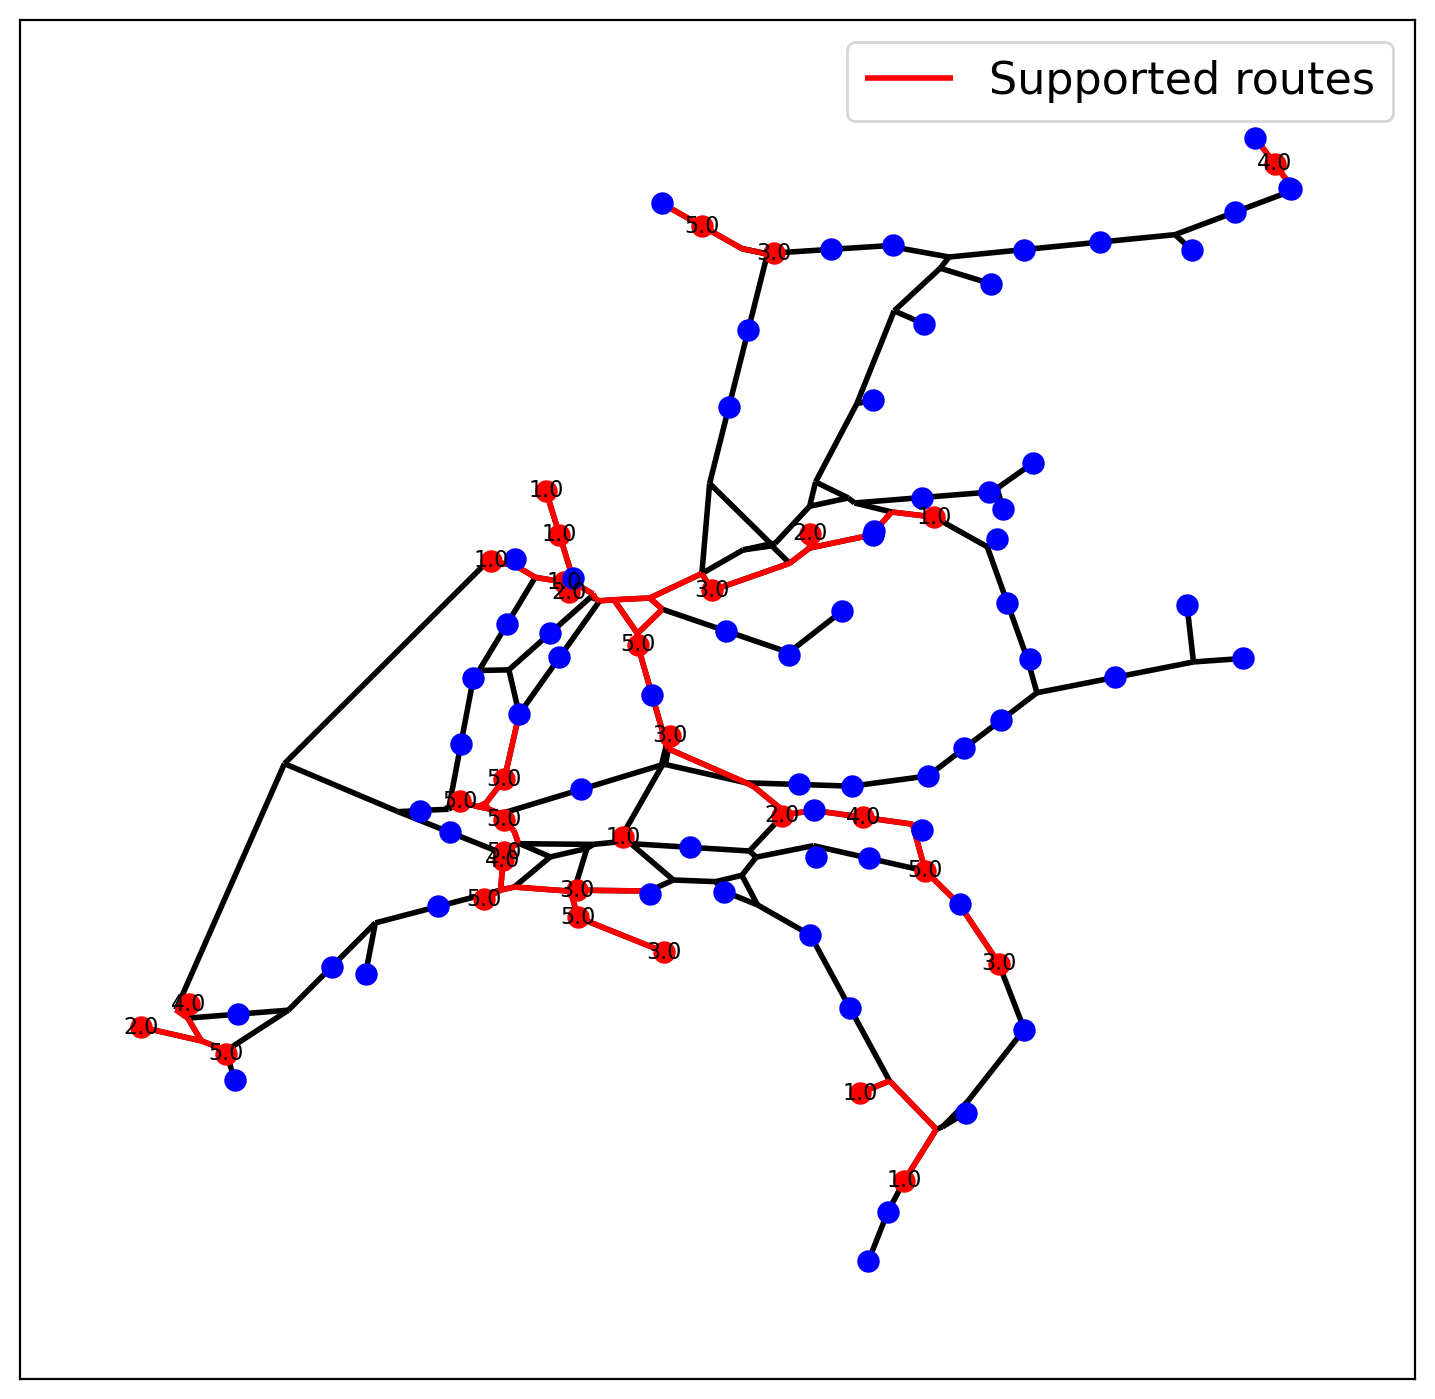

In [2]:
total_flow, fraction_captured_total, serveable_fraction, served_fraction, optimal_facilities, non_zero_flows, routes_supported, paths, G, df_abm, df_random = flow_refueling_location_model(1, 50000, 100, 5, 5, 30, vis=False)

### range 100km

Optimal


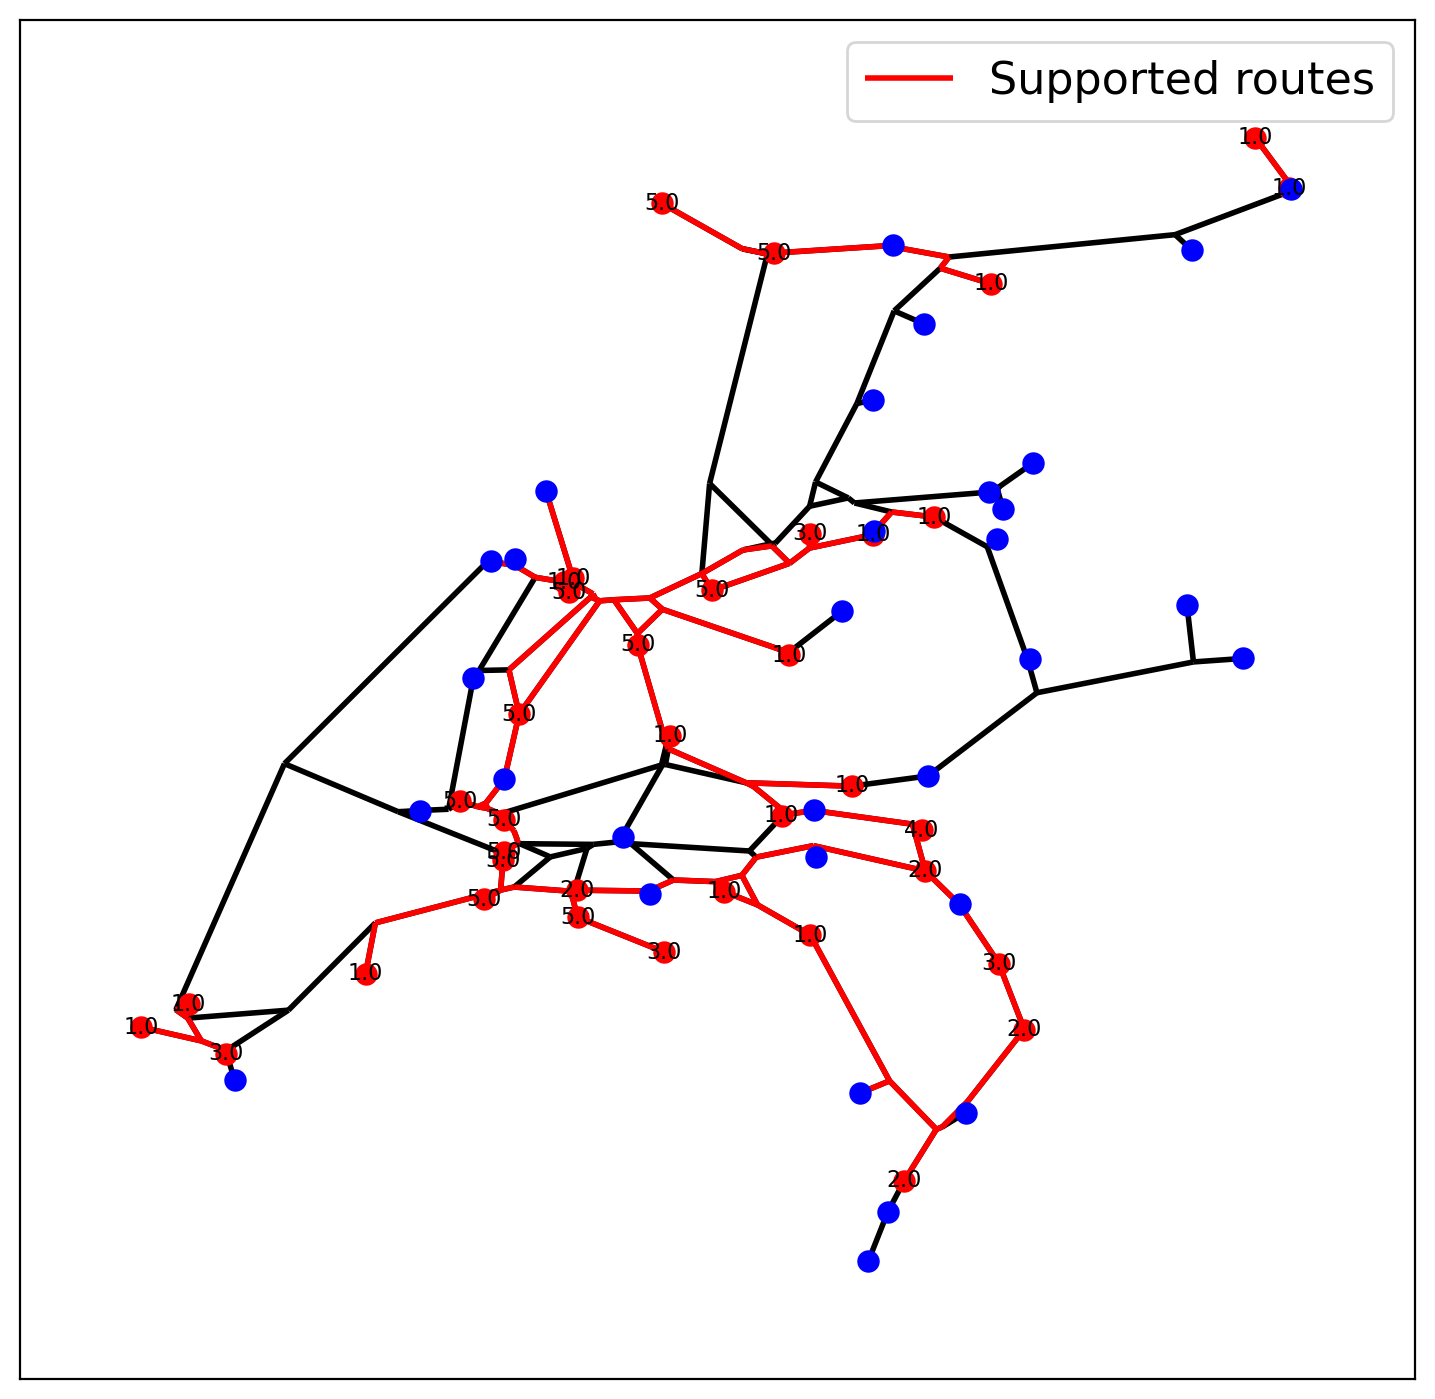

(1258.894481409002,
 0.27399678769508534,
 0.44508059971483055,
 0.6156116170209148,
 {'22637863': 2.0,
  '22638146': 1.0,
  '22638156': 0.0,
  '22638320': 0.0,
  '22638327': 4.0,
  '30984595': 5.0,
  '8861305': 0.0,
  '8861462': 0.0,
  '8861528': 1.0,
  '8861625': 0.0,
  '8861718': 0.0,
  '8862085': 0.0,
  '8862497': 0.0,
  '8862506': 0.0,
  '8862570': 0.0,
  '8862663': 5.0,
  '8863019': 0.0,
  '8863125': 0.0,
  '8863152': 0.0,
  '8863207': 0.0,
  '8863260': 1.0,
  '8863306': 5.0,
  '8863360': 5.0,
  '8863408': 0.0,
  '8863469': 3.0,
  '8863518': 1.0,
  '8863614': 1.0,
  '8863709': 3.0,
  '8863818': 5.0,
  '8863861': 0.0,
  '8863966': 0.0,
  '8864005': 5.0,
  '8864018': 0.0,
  '8864111': 1.0,
  '8864153': 0.0,
  '8864494': 1.0,
  '8864566': 3.0,
  '8864837': 5.0,
  '8864954': 0.0,
  '8865003': 5.0,
  '8865412': 0.0,
  '8865600': 2.0,
  '8865605': 5.0,
  '8865756': 5.0,
  '8865990': 1.0,
  '8866297': 1.0,
  '8866425': 0.0,
  '8866564': 0.0,
  '8866627': 0.0,
  '8866671': 0.0,
  '886668

In [16]:
flow_refueling_location_model(1, 100000, 100, 5, 5, vis=True)


Optimal


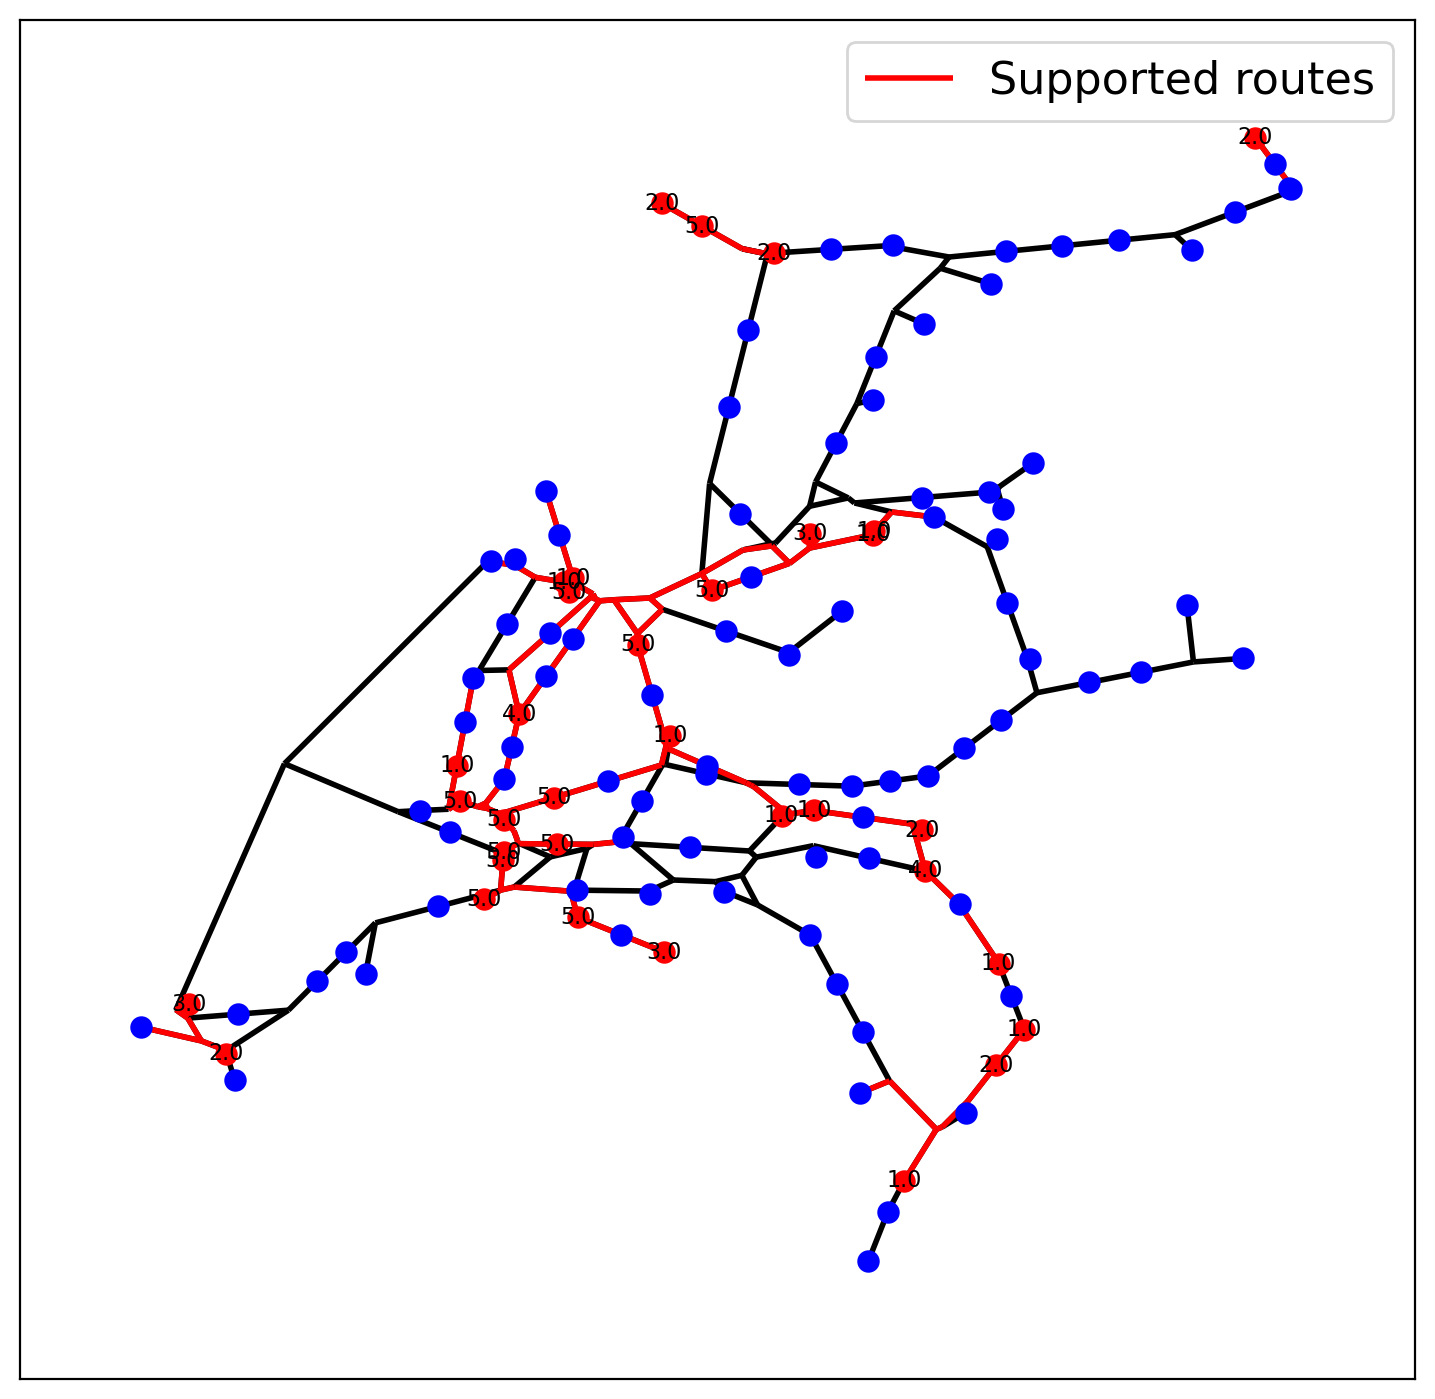

(1256.8089236790609,
 0.28511419815937067,
 0.8347144390907324,
 0.34157094307599384,
 {'109': 0.0,
  '110': 0.0,
  '111': 0.0,
  '112': 0.0,
  '113': 5.0,
  '114': 0.0,
  '115': 0.0,
  '116': 0.0,
  '119': 0.0,
  '120': 0.0,
  '121': 0.0,
  '122': 0.0,
  '123': 0.0,
  '124': 0.0,
  '125': 0.0,
  '126': 0.0,
  '127': 0.0,
  '128': 0.0,
  '129': 0.0,
  '130': 0.0,
  '131': 0.0,
  '132': 0.0,
  '133': 0.0,
  '134': 2.0,
  '135': 0.0,
  '136': 0.0,
  '137': 0.0,
  '138': 0.0,
  '139': 5.0,
  '140': 0.0,
  '141': 0.0,
  '142': 1.0,
  '143': 0.0,
  '144': 0.0,
  '145': 0.0,
  '146': 0.0,
  '147': 0.0,
  '148': 0.0,
  '149': 0.0,
  '150': 0.0,
  '151': 0.0,
  '152': 0.0,
  '153': 0.0,
  '154': 0.0,
  '155': 0.0,
  '156': 0.0,
  '157': 0.0,
  '158': 0.0,
  '159': 0.0,
  '160': 5.0,
  '22637863': 1.0,
  '22638146': 1.0,
  '22638156': 0.0,
  '22638320': 0.0,
  '22638327': 2.0,
  '30984595': 5.0,
  '8861305': 0.0,
  '8861462': 0.0,
  '8861528': 0.0,
  '8861625': 0.0,
  '8861718': 0.0,
  '8862085

In [17]:
flow_refueling_location_model(1, 100000, 100, 5, 5, 50, vis=True)